# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
def whitespaces(str):
    final = ''
    for i in range(len(str)):
        if str[i] != ' ':
            final += str[i]
    return (final)

In [2]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from config import owm_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    
    # If the city is unique, then add it to a our cities list
    if city.city_name.title() not in cities:
        cities.append(city.city_name.title())
        countries.append(city.country_code.upper())

# Print the city count to confirm sufficient count
lngth = len(cities)
print(lngth)


631


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#set variable to store base url for api request
base_url = 'http://api.openweathermap.org/data/2.5/weather?appid=' + owm_key + '&q='


In [5]:
#initialize variables for DataFrame
lat = []
lng = []
temp = []
humid = []
cloud = []
wind = [] 

#print the process of processing api calls per city
print('Beginning Data Retrival')
print('-----------------------------')
#testing with 3 -> replace with lngth
for i in range(lngth):
    response = requests.get(base_url + whitespaces(cities[i]) + ',' + countries[i]).json()
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        print('Processing Record '+ str(i+1) + ' of ' + str(lngth) + ' | ' + 'City: ' + cities[i])
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        temp.append(np.nan)
        humid.append(np.nan)
        cloud.append(np.nan)
        wind.append(np.nan)
        print(f"{response['message']}. Skipping...")

print('-----------------------------')
print('Data Retrieval Completed')
print('-----------------------------')



Beginning Data Retrival
-----------------------------
Processing Record 1 of 631 | City: Xai-Xai
Processing Record 2 of 631 | City: Luchenza
Processing Record 3 of 631 | City: Bowen
Processing Record 4 of 631 | City: Hilo
city not found. Skipping...
Processing Record 6 of 631 | City: Mecca
Processing Record 7 of 631 | City: Lebu
city not found. Skipping...
city not found. Skipping...
Processing Record 10 of 631 | City: Kahului
Processing Record 11 of 631 | City: Victoria
Processing Record 12 of 631 | City: Busselton
city not found. Skipping...
city not found. Skipping...
Processing Record 15 of 631 | City: Dikson
Processing Record 16 of 631 | City: Wanning
Processing Record 17 of 631 | City: Chokurdakh
Processing Record 18 of 631 | City: Tuatapere
city not found. Skipping...
Processing Record 20 of 631 | City: Vao
city not found. Skipping...
Processing Record 22 of 631 | City: Longyearbyen
Processing Record 23 of 631 | City: Dalton
city not found. Skipping...
city not found. Skipping..

Processing Record 202 of 631 | City: Rocha
Processing Record 203 of 631 | City: Bismarck
Processing Record 204 of 631 | City: Souillac
Processing Record 205 of 631 | City: Weligama
Processing Record 206 of 631 | City: Bundaberg
Processing Record 207 of 631 | City: Mananjary
Processing Record 208 of 631 | City: Itupiranga
city not found. Skipping...
Processing Record 210 of 631 | City: Sitka
Processing Record 211 of 631 | City: Cooma
Processing Record 212 of 631 | City: Kavieng
Processing Record 213 of 631 | City: Acapulco
Processing Record 214 of 631 | City: Jalpan
Processing Record 215 of 631 | City: Tarata
city not found. Skipping...
Processing Record 217 of 631 | City: Aklavik
city not found. Skipping...
city not found. Skipping...
city not found. Skipping...
Processing Record 221 of 631 | City: Bilma
Processing Record 222 of 631 | City: Cidreira
Processing Record 223 of 631 | City: Georgetown
Processing Record 224 of 631 | City: Visnes
Processing Record 225 of 631 | City: Portland


Processing Record 406 of 631 | City: Onguday
Processing Record 407 of 631 | City: Harper
Processing Record 408 of 631 | City: Jumla
Processing Record 409 of 631 | City: Sarangani
Processing Record 410 of 631 | City: Anaconda
city not found. Skipping...
Processing Record 412 of 631 | City: Jieshi
city not found. Skipping...
Processing Record 414 of 631 | City: Methven
city not found. Skipping...
Processing Record 416 of 631 | City: Tromso
city not found. Skipping...
Processing Record 418 of 631 | City: Sompeta
city not found. Skipping...
Processing Record 420 of 631 | City: Sibolga
city not found. Skipping...
Processing Record 422 of 631 | City: Pawai
city not found. Skipping...
city not found. Skipping...
city not found. Skipping...
Processing Record 426 of 631 | City: Tabou
Processing Record 427 of 631 | City: Almeirim
city not found. Skipping...
Processing Record 429 of 631 | City: Chicama
city not found. Skipping...
city not found. Skipping...
Processing Record 432 of 631 | City: Ju

Processing Record 611 of 631 | City: Odienne
Processing Record 612 of 631 | City: Nouadhibou
Processing Record 613 of 631 | City: Chinchani
Processing Record 614 of 631 | City: Gap
Processing Record 615 of 631 | City: Katsuura
Processing Record 616 of 631 | City: Owo
Processing Record 617 of 631 | City: Ust-Kuyga
city not found. Skipping...
Processing Record 619 of 631 | City: Saint-Augustin
Processing Record 620 of 631 | City: Utete
Processing Record 621 of 631 | City: Izhma
Processing Record 622 of 631 | City: Abadiania
city not found. Skipping...
Processing Record 624 of 631 | City: Saliste
Processing Record 625 of 631 | City: Churapcha
Processing Record 626 of 631 | City: Nsanje
city not found. Skipping...
city not found. Skipping...
Processing Record 629 of 631 | City: Likhoy
Processing Record 630 of 631 | City: Petropavlovka
city not found. Skipping...
-----------------------------
Data Retrieval Completed
-----------------------------


In [8]:
#assemble the DataFrame of results
result_df = pd.DataFrame({
    'City': cities,
    'Country': countries,
    'Latitude': lat,
    'Longitude': lng,
    'Temperature': temp,
    'Humidity (%)': humid,
    'Cloudiness (%)': cloud,
    'Wind Speed (mph)': wind
})

In [9]:
result_df.head()

,City,Country,Latitude,Longitude,Temperature,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Xai-Xai,MZ,-25.04,33.64,294.73,92.0,36.0,9.91
1,Luchenza,MW,-16.01,35.31,295.23,54.0,0.0,3.36
2,Bowen,AU,-20.01,148.25,300.15,54.0,40.0,5.70
3,Hilo,US,19.71,-155.08,299.33,68.0,75.0,5.10
4,Arraial Do Cabo,BR,NaN,NaN,NaN,NaN,NaN,NaN


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
#remove the rows where api calls returned no usable data
result_df = result_df.dropna()

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [7]:
#### Latitude vs. Temperature Plot

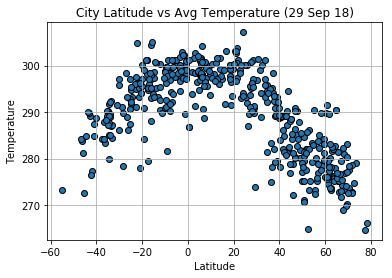

In [12]:
#scatterplot of latitude
plt.scatter(x=result_df.Latitude, 
            y=result_df.Temperature,
           edgecolor = 'black')

plt.title('City Latitude vs Avg Temperature (29 Sep 18)')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.grid()

plt.savefig("./output_data/Lat-vs-Temp.png")

plt.show()

#### Latitude vs. Humidity Plot

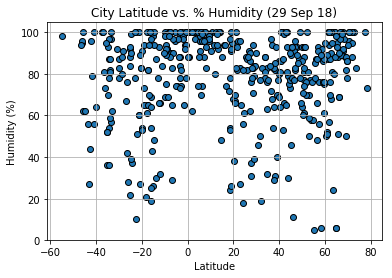

In [13]:
#latitude vs. humidity
plt.scatter(x=result_df.Latitude, 
            y=result_df['Humidity (%)'],
           edgecolor = 'black')

plt.title('City Latitude vs. % Humidity (29 Sep 18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

#save plot
plt.savefig('./output_data/Lat-vs-Humid.png')

#### Latitude vs. Cloudiness Plot

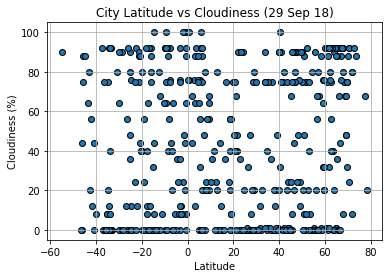

In [14]:
#Latitude vs cloudiness plt
plt.scatter(x=result_df.Latitude,
           y=result_df['Cloudiness (%)'],
           edgecolor = 'black')

plt.title('City Latitude vs Cloudiness (29 Sep 18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

#save plot
plt.savefig('./output_data/Lat-vs-Cloud.png')

#### Latitude vs. Wind Speed Plot

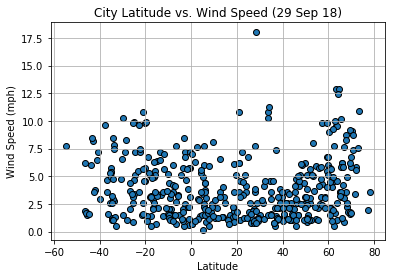

In [15]:
#Latitude vs Wind Speed
plt.scatter(x=result_df.Latitude,
           y=result_df['Wind Speed (mph)'],
           edgecolor = 'black')

plt.title('City Latitude vs. Wind Speed (29 Sep 18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()

#save fig
plt.savefig('./output_data/Lat-vs-WindSpeed.png')

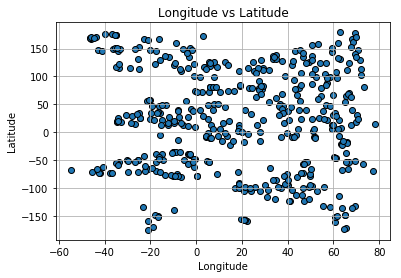

In [16]:
#rough map: lat vs lng
plt.scatter(x=result_df.Latitude,
           y=result_df.Longitude,
           edgecolor='black')

plt.title('Longitude vs Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()

#save fig
plt.savefig('./output_data/Map-Lat-vs-Long.png')